In [37]:
import os, sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


In [38]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [39]:
from preparation import EDA

In [4]:
data = pd.read_csv("../data/cleaned_data.csv") 
data.head()

C:\Users\Tsegaye\AppData\Local\Temp\ipykernel_16968\1066954683.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/cleaned_data.csv")


,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
eda = EDA(data)

In [6]:
missing_values = eda.missing_data_summary()
missing_values

,Missing Count,Percentage (%)
VehicleIntroDate,1000098,100.0


**Drop Columns with High Missing Data:**

- Columns with high missing values offer little analytical value.
**Dropped Columns**

- NumberOfVehiclesInFleet (100% missing)
- CrossBorder (~99.93%)
- CustomValueEstimate (~77.96%)
- Converted, Rebuilt, WrittenOff (~64.18%)

In [7]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = eda.handle_missing_data('high', cols_to_drop)
data.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,False,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


**Impute Moderate Missing Data:**

- Imputation preserves useful information, using the mode for categorical and median for numerical columns.

**Imputed Columns:**

- NewVehicle (~15.33%)
- Bank (~14.59%)
- AccountType (~4.02%)

In [8]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = eda.handle_missing_data('moderate', missing_cols)

**Handle Low Missing Data - Standard Imputation**

These columns can be reasonably imputed without affecting data quality.

**Imputed Columns:**

- Gender (~0.95%)
- MaritalStatus (~0.83%)
- Various vehicle-related columns (~0.055% each): Cylinders, CubicCapacity, Kilowatts`, etc.

In [9]:
# Handle low missing data (standard imputation)
missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

data = eda.handle_missing_data('low', missing_cols)

**Overall Decision Summary:**

- High missing data: Dropped.

- Moderate missing data: Imputed with mode (categorical) or median (numerical).

- Low missing data: Imputed to avoid unnecessary data loss.

**Identify Unique Categories:**

Check unique values for categorical features and decide on encoding strategy.

In [10]:
category = eda.categorical_summary()

In [11]:
category

,Column,DataType,NumUniqueValues
0,TransactionMonth,object,23
1,Citizenship,object,4
2,LegalType,object,6
3,Title,object,5
4,Language,object,1
5,Bank,object,11
6,AccountType,object,3
7,MaritalStatus,object,3
8,Gender,object,3
9,Country,object,1


**Key Insights from the Summary:**

- Columns like Language, Country, ItemType, StatutoryClass, and StatutoryRiskType don't provide variability.

- Drop these columns from the dataset.

- Model (411 unique values) could add complexity.

- Consider reducing cardinality by grouping or applying target encoding.

- Columns like AlarmImmobiliser, TrackingDevice, and NewVehicle have only 2 unique values.

- TransactionMonth should be converted to a date format.

- Extract useful features like year, month, and quarter if necessary.

- CapitalOutstanding should be numeric and can be used as a continuous feature.

In [12]:
columns_to_drop = ['Language', 'Country', 'ItemType', 'StatutoryClass', 'StatutoryRiskType']
data = data.drop(columns=columns_to_drop)

Convert the CapitalOutstanding to numeric format

In [13]:
# Convert 'CapitalOutstanding' to numeric, coerce errors to handle non-numeric values (e.g., empty strings or NaNs)
data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'], errors='coerce')

# Fill missing values if necessary, e.g., with 0 or the column's mean
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(0)  # Or data['CapitalOutstanding'].fillna(data['CapitalOutstanding'].mean())

# Ensure it's a float type
data['CapitalOutstanding'] = data['CapitalOutstanding'].astype(float)

# Verify the conversion
print(data['CapitalOutstanding'].dtype)

float64


Convert boolean 'IsVATRegistered' to integer

In [14]:
# Convert boolean 'IsVATRegistered' to integer
data = eda.boolean_to_integer("IsVATRegistered")
#data['IsVATRegistered'] = data['IsVATRegistered'].astype(int)

Convert the TransactionMonth to a datetime format and extract relevant features.

In [15]:
data.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,0,145249,12827,2015-03-01 00:00:00,0,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,1,145249,12827,2015-05-01 00:00:00,0,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,2,145249,12827,2015-07-01 00:00:00,0,,Close Corporation,Mr,English,First National Bank,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,3,145255,12827,2015-05-01 00:00:00,1,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0
4,4,145255,12827,2015-07-01 00:00:00,1,,Close Corporation,Mr,English,First National Bank,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [16]:
eda.add_transaction_date_features()
data.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,TransactionMonthOnly,TransactionQuarter
0,0,145249,12827,2015-03-01,0,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,3,1
1,1,145249,12827,2015-05-01,0,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,5,2
2,2,145249,12827,2015-07-01,0,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3
3,3,145255,12827,2015-05-01,1,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0,2015,5,2
4,4,145255,12827,2015-07-01,1,,Close Corporation,Mr,English,First National Bank,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3


Check the Distribution of Title, MaritalStatus, and Gender

In [17]:
print(f'Gender Distribution:\n{data.Gender.value_counts()}')
print(f'Title Distribution:\n {data.Title.value_counts()}')
print(f'Marital Status Distribution:\n {data.MaritalStatus.value_counts()}')

Gender Distribution:
Gender
Not specified    950526
Male              42817
Female             6755
Name: count, dtype: int64
Title Distribution:
 Title
Mr      933555
Mrs      45850
Ms       13269
Miss      6614
Dr         810
Name: count, dtype: int64
Marital Status Distribution:
 MaritalStatus
Not specified    994467
Single             4254
Married            1377
Name: count, dtype: int64


##### **High Proportion of Unspecified Gender:**

- A significant portion of the Gender values (950,526) is missing or unspecified.

    - These unspecified gender values can be filled using the information from the Title column where available.
**Title-to-Gender Mapping:**

- Titles like Mr, Mrs, Miss, and Ms provide a clear indication of gender.
- Dr is ambiguous and may not specify gender directly.
**Approach to Impute Missing Genders Using Titles:**

- Mr → Male

- Mrs, Miss, Ms → Female

- Dr → Leave as Not specified (since it’s ambiguous)

In [18]:
count = (data["Gender"] == "Not specified").sum()
count

950526

In [19]:
data = eda.map_title_to_gender('Title', 'Gender')

In [20]:
count = (data["Gender"] == "Not specified").sum()
count
data.head()


,Unnamed: 0,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,TransactionMonthOnly,TransactionQuarter
0,0,145249,12827,0,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,3,1
1,1,145249,12827,0,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,5,2
2,2,145249,12827,0,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3
3,3,145255,12827,1,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,54.824561,0.0,2015,5,2
4,4,145255,12827,1,,Close Corporation,Mr,English,First National Bank,Current account,...,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,2015,7,3


In [21]:
print(data["Gender"].value_counts())

Gender
Male      933555
Female     65733
Name: count, dtype: int64


**Balanced Gender Distribution:**

The number of male and female entries is now significantly more balanced compared to the initial state where a large portion of the Gender values were unspecified.

Dropping the MaritalStatus column is a reasonable decision given the high proportion of unspecified values

In [22]:
data.columns.to_list()

['Unnamed: 0',
 'UnderwrittenCoverID',
 'PolicyID',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims',
 'TransactionYear',
 'TransactionMonthOnly',
 'TransactionQuarter']

In [23]:
# Drop the 'MaritalStatus' column from the DataFrame
data.drop(columns=['MaritalStatus'], inplace = True)

In [24]:
data.columns.to_list()

['Unnamed: 0',
 'UnderwrittenCoverID',
 'PolicyID',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims',
 'TransactionYear',
 'TransactionMonthOnly',
 'TransactionQuarter']


**Encoding Strategy:**

- Label Encoding: For binary or low-cardinality features.
- One-Hot Encoding: For moderate cardinality features where the number of new columns remains manageable.
- Target Encoding: For high cardinality features to reduce the number of new features while capturing useful patterns.
- Frequency Encoding: Another option for high cardinality features, where you replace categories with their frequency in the dataset.

In [25]:
data = eda.encode_categorical_features()

In [26]:
data.head()

,Unnamed: 0,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,AccountType,Gender,...,CoverGroup_Motor Comprehensive,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,SubCrestaZone_freq,make_freq,Model_freq,CapitalOutstanding_freq,CoverCategory_freq,CoverType_freq
0,0,145249,12827,0,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,42168,41940,180,72,97313,103763
1,1,145249,12827,0,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,42168,41940,180,72,97313,103763
2,2,145249,12827,0,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,42168,41940,180,72,97313,103763
3,3,145255,12827,1,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,42168,41940,180,72,8776,104183
4,4,145255,12827,1,0,0,2,0,0,1,...,0.0,0.0,0.0,0.0,42168,41940,180,72,8776,104183


In [27]:
data.columns.to_list()

['Unnamed: 0',
 'UnderwrittenCoverID',
 'PolicyID',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'AccountType',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'VehicleIntroDate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'NewVehicle',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims',
 'TransactionYear',
 'TransactionMonthOnly',
 'TransactionQuarter',
 'Bank_Capitec Bank',
 'Bank_First National Bank',
 'Bank_FirstRand Bank',
 'Bank_Investec Bank',
 'Bank_Ithala Bank',
 'Bank_Mercantile Lisbon Bank',
 'Bank_Nedbank',
 'Bank_Old Mutual',
 'Bank_RMB Private Bank',
 'Bank_Standard Bank',
 'MainCrestaZone_Cape Province (Cape Town)',
 'MainCrestaZone_Cape Province (East and North of Cape Town)',
 'MainCrestaZone_Ciskei, Cape Mid 

**Create new feature from TotalPremium and TotalClaims**

In [28]:
data['Premium_to_Claims_Ratio'] = data['TotalPremium'] / (data['TotalClaims'] + 1)

**Scaling Before Feature Selection:**

Feature scaling should typically be performed before feature selection. This ensures that all features are on a comparable scale before we apply selection techniques like SelectKBest, which may rely on statistical methods sensitive to scale, such as f_classif or mutual_info_classif.

If features have different ranges, features with larger scales might dominate the selection process, making the selection biased toward those features. By scaling before selection, each feature contributes fairly to the selection criteria.

In [29]:
# Separate Target and Feature Variables
X = data.drop(columns=['TotalPremium', 'TotalClaims'])
y = data['TotalPremium']  # or 'TotalClaims' depending on the target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature selection and dimensionality reduction

In [30]:
#  Feature Selection using SelectKBest

selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_new = selector.fit_transform(X_scaled, y)

c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [ 7 10 13 21 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Reduce Dimensionality In large datasets with many features, some features might be redundant or highly correlated. PCA transforms these features into a smaller set of uncorrelated variables called principal components, which capture most of the variability in the data. This can lead to simpler, faster models that are less prone to overfitting.

In [31]:
# Example: Dimensionality Reduction using PCA
pca = PCA(n_components=20)  # Reduce to 20 principal components
X_pca = pca.fit_transform(X)

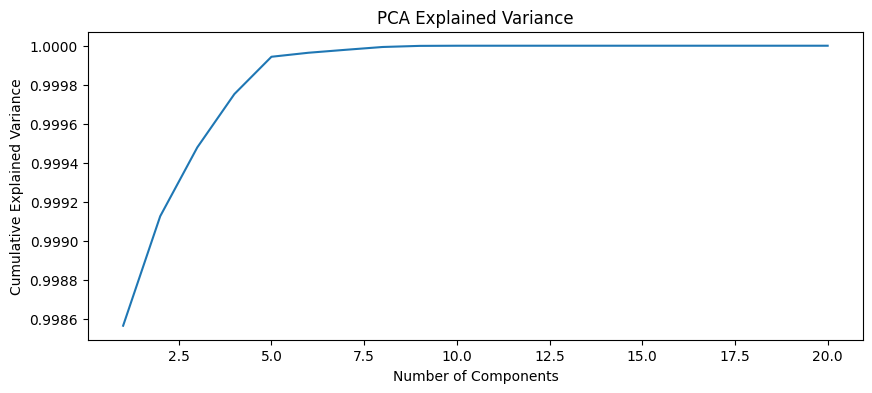

In [32]:
# Plot explained variance
plt.figure(figsize=(10, 4))
sns.lineplot(x=range(1, 21), y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [33]:
selected_features = X.columns[selector.get_support()]

In [34]:
# Create new dataframe with selected features
df_new = pd.DataFrame(X_new, columns=selected_features)
# merge the target variable to the new dataframe
df_new['TotalPremium'] = y

In [35]:
df_new.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,RegistrationYear,CalculatedPremiumPerTerm,Product,Bank_Investec Bank,Bank_Mercantile Lisbon Bank,MainCrestaZone_Natal (Durban),bodytype_C/P,...,ExcessSelected_Mobility - R250,ExcessSelected_Mobility - Trailers,ExcessSelected_Mobility - Windscreen,ExcessSelected_No excess,CoverGroup_Baggage/Luggage,CoverGroup_Comprehensive - Taxi,CoverGroup_Trailer,CoverCategory_freq,CoverType_freq,TotalPremium
0,0.638791,0.920659,-0.071027,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,...,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,0.462091,-0.008718,0.374133,0.459047,21.929825
1,0.638791,0.920659,-0.071027,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,...,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,0.462091,-0.008718,0.374133,0.459047,21.929825
2,0.638791,0.920659,-0.071027,-1.908809,-0.460139,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,...,-0.021521,-0.008718,3.045838,-1.946355,-0.013115,0.462091,-0.008718,0.374133,0.459047,0.000000
3,0.638886,0.920659,14.079159,-1.908809,1.888399,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,...,-0.021521,-0.008718,-0.328317,-1.946355,-0.013115,0.462091,-0.008718,-2.852745,0.478056,54.824561
4,0.638886,0.920659,14.079159,-1.908809,1.888399,3.248695,-0.027064,-0.011619,-0.300558,-0.025384,...,-0.021521,-0.008718,-0.328317,-1.946355,-0.013115,0.462091,-0.008718,-2.852745,0.478056,0.000000


In [36]:
# Save the new dataframe to csv for model training
df_new.to_csv('../data/prepared_data.csv', index=False)